### Init stuff

In [1]:
from matplotlib.pyplot import *
import matplotlib
from numpy import *
import pandas as pd
import niddk_covid_sicr as ncs
from datetime import datetime, timedelta
from pathlib import Path
import seaborn as sns

ModuleNotFoundError: No module named 'us_state_abbrev'

In [ ]:
%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

### Define paths and other

In [19]:
models = ['SICRdiscreteNwk','SICRdiscrete1Nwk','SICRdiscrete2Nwk', 'SICRdiscrete3Nwk', 'SICRdiscrete4Nwk']
models = 
models_path = '/home/schwartzao/covid-sicr/models/' 
casepath = '/home/schwartzao/covid-sicr/data/covidtimeseries_'
fits_path = '/data/schwartzao/covid-sicr/fits/20210303/'
tables_path = '/data/schwartzao/covid-sicr/tables/20210303/'
figures_path = '/data/schwartzao/covid-sicr/figures/20210303/'

## Get ROIs from fits path

In [4]:
fits = [x for x in Path(fits_path).iterdir() if model for models in str(x)]
rois = []
for fit in fits:
    model_roi = str(fit).split('.')[0].split('/')[-1]
    model = model_roi.split('_',1)[0]
    if model == models[0]:
        rois.append(model_roi.split('_',1)[1])
        
rois = set(rois)
print(set(rois))

NameError: name 'model' is not defined

### Define ROI, if only looking at a single ROI

In [20]:
# rois = ['CA_Alberta', 'CA_BC', 'CA_Manitoba', 'CA_NL', 'CA_NWT', 'CA_New Brunswick', 'CA_Nova Scotia', 
#         'CA_Nunavut', 'CA_Ontario', 'CA_PEI', 'CA_Quebec', 'CA_Saskatchewan', 'CA_Yukon', 'US_AK', 'US_AL',
#         'US_AR', 'US_AZ', 'US_CO', 'US_CT', 'US_DC', 'US_DE', 'US_GU', 'US_HI', 'US_IA', 'US_ID', 'US_IN', 'US_KS', 
#         'US_KY', 'US_LA', 'US_MA', 'US_MD', 'US_ME', 'US_MI', 'US_MN', 'US_MP', 'US_MS', 'US_MT', 'US_NC', 'US_ND', 
#         'US_NE', 'US_NH', 'US_NJ', 'US_NM', 'US_NY', 'US_OH', 'US_OK', 'US_OR', 'US_PA', 'US_PR', 'US_RI', 'US_SC', 
#         'US_SD', 'US_TN', 'US_TX', 'US_UT', 'US_VA', 'US_VI', 'US_VT', 'US_WI', 'US_WV', 'US_WY', 
#         'Canada', 'US']
# rois.sort()
# print(rois)
rois=['US_NY']

# Define functions for weekly data (discrete models)

In [14]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

def plotXt(ax,Xt,x,c):
    Xtlb = percentile(Xt,2.5,axis=0)
    Xtm = percentile(Xt,50,axis=0)
    Xtub = percentile(Xt,97.5,axis=0)
    
    ax.plot(x,Xtm,color=c,lw=lw,label="median")
    ax.fill_between(x,Xtlb,Xtub,color=c,alpha=a)
    ax.plot(x,Xtlb,color='k')
    ax.plot(x,Xtub,color='k')
    simpleaxis(ax)

    return

###### AOS ADDED #########
# def plot_ts_weekly(ax,c,r,d,x):
def plot_ts_weekly(ax,c,r,d,x,df):
    Clb = percentile(c,2.5,axis=0)
    Cm = percentile(c,50,axis=0)
    Cub = percentile(c,97.5,axis=0)

    Rlb = percentile(r,2.5,axis=0)
    Rm = percentile(r,50,axis=0)
    Rub = percentile(r,97.5,axis=0)

    Dlb = percentile(d,2.5,axis=0)
    Dm = percentile(d,50,axis=0)
    Dub = percentile(d,97.5,axis=0)

    mecolor = 'none'

    ax[0].plot(df["weeklytotal_new_cases"].values,'bo',ms=10, markeredgecolor=mecolor,label="cases data")
    ax[1].plot(df["weeklytotal_new_recover"].values,'gs',ms=10, markeredgecolor=mecolor,label="recovered data")
    ax[2].plot(df["weeklytotal_new_deaths"].values,'k^',ms=10, markeredgecolor=mecolor,label="deaths data")

    # print(c)
    ax[0].plot(x,Cm,color='b',lw=lw,label="case median fit")
    ax[0].fill_between(x,Clb,Cub,color='b',alpha=a)
    
    ax[1].plot(x,Rm,color='g',lw=lw,label="recovered median fit")
    ax[1].fill_between(x,Rlb,Rub,color='g',alpha=a)
    
    ax[2].plot(x,Dm,color='k',lw=lw,label="deaths median fit")
    ax[2].fill_between(x,Dlb,Dub,color='k',alpha=a)
    
    
    ax[0].plot(x,Clb,color='k')
    ax[0].plot(x,Cub,color='k')
    
    ax[1].plot(x,Rlb,color='k')
    ax[1].plot(x,Rub,color='k')
    
    ax[2].plot(x,Dlb,color='k')
    ax[2].plot(x,Dub,color='k')
    
    for i in range(3):
        ax[i].set_ylabel('total-counts-per-week')
        ax[i].set_xlabel('week from t0')

        if i==0:
            ax[0].plot(0,0,linestyle='none',color='none', label='shaded: 95% C.I.')
        ax[i].legend(loc=2)
        simpleaxis(ax[i])
    
    
    ax[0].set_title('new cases by week')
    ax[1].set_title('new recovered by week')
    ax[2].set_title('new deaths by week')
    
      
    return

# Define functions for NON weekly data (old models)

In [21]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)



def plot_ts(ax,c,r,d,x):
    Clb = percentile(c,2.5,axis=0)
    Cm = percentile(c,50,axis=0)
    Cub = percentile(c,97.5,axis=0)

    Rlb = percentile(r,2.5,axis=0)
    Rm = percentile(r,50,axis=0)
    Rub = percentile(r,97.5,axis=0)

    Dlb = percentile(d,2.5,axis=0)
    Dm = percentile(d,50,axis=0)
    Dub = percentile(d,97.5,axis=0)

    mecolor = 'none'
    ax[0].plot(DF["new_cases"].values,'bo',ms=10, markeredgecolor=mecolor,label="cases data")
    ax[1].plot(DF["new_recover"].values,'gs',ms=10, markeredgecolor=mecolor,label="recovered data")
    ax[2].plot(DF["new_deaths"].values,'k^',ms=10, markeredgecolor=mecolor,label="deaths data")

    # print(c)
    ax[0].plot(x,Cm,color='b',lw=lw,label="case median fit")
    ax[0].fill_between(x,Clb,Cub,color='b',alpha=a)
    
    ax[1].plot(x,Rm,color='g',lw=lw,label="recovered median fit")
    ax[1].fill_between(x,Rlb,Rub,color='g',alpha=a)
    
    ax[2].plot(x,Dm,color='k',lw=lw,label="deaths median fit")
    ax[2].fill_between(x,Dlb,Dub,color='k',alpha=a)
    
    
    ax[0].plot(x,Clb,color='k')
    ax[0].plot(x,Cub,color='k')
    
    ax[1].plot(x,Rlb,color='k')
    ax[1].plot(x,Rub,color='k')
    
    ax[2].plot(x,Dlb,color='k')
    ax[2].plot(x,Dub,color='k')
    
    for i in range(3):
        ax[i].set_ylabel('counts-per-day')
        ax[i].set_xlabel('day from t0')
#         ax[i].set_xticks(xticks_)
#         ax[i].set_xticklabels(xdates_)
#         ax[i].axvline(tm,linestyle='dashed',color='k',label='mitigation')
#         ax[i].axvline(tfit,color='k')
        if i==0:
            ax[0].plot(0,0,linestyle='none',color='none', label='shaded: 95% C.I.')
        ax[i].legend(loc=2)
        simpleaxis(ax[i])
    
    
    ax[0].set_title('new cases per day')
    ax[1].set_title('new recovered per day')
    ax[2].set_title('new deaths per day')
    
    
    
    return

def plotXt(ax,Xt,x,c):
    Xtlb = percentile(Xt,2.5,axis=0)
    Xtm = percentile(Xt,50,axis=0)
    Xtub = percentile(Xt,97.5,axis=0)
    
    ax.plot(x,Xtm,color=c,lw=lw,label="median")
    ax.fill_between(x,Xtlb,Xtub,color=c,alpha=a)
    ax.plot(x,Xtlb,color='k')
    ax.plot(x,Xtub,color='k')
    simpleaxis(ax)
#     ax.set_ylabel('secondary infections per infected')
#     ax.set_xticks(xticks_)
#     ax.set_xticklabels(xdates_)
#     ax.set_ylim((0,32))
#     ax.set_yticks(y_)
#     ax.axvline(tm,linestyle='dashed',color='k',label='mitigation')
#     ax.axvline(tfit,color='k')
    return

# Format data for weekly totals

In [15]:
def load_and_format(casepath, roi):

    csv = casepath + roi + ".csv"
    df = pd.read_csv(csv) # load data
    
    df['Date'] = pd.to_datetime(df['dates2']) # used to calculate leading week
    df.set_index('Date', inplace=True) # need this for df.resample()
    start_day = df.index[0] - timedelta(1)
    start_day = start_day.strftime("%A")
    start_abr = start_day.upper()[:3] # get 3 letter abbrev

    df['weeklytotal_new_cases'] = df.new_cases.resample('W-{}'.format(start_abr)).sum()
    df['weeklytotal_new_recover'] = df.new_recover.resample('W-{}'.format(start_abr)).sum()
    df['weeklytotal_new_deaths'] = df.new_deaths.resample('W-{}'.format(start_abr)).sum()
    df.dropna(inplace=True) # drop last rows if they spill over weekly chunks and present NAs
        # will also remove non-weekly dates so each element is by weekly amount

    df.weeklytotal_new_cases = df.weeklytotal_new_cases.astype(int) # convert float to int
    df.weeklytotal_new_recover = df.weeklytotal_new_recover.astype(int)
    df.weeklytotal_new_deaths = df.weeklytotal_new_deaths.astype(int)

    # handle negatives by setting to 0
    df['weeklytotal_new_cases'] = df['weeklytotal_new_cases'].clip(lower=0)
    df['weeklytotal_new_recover'] = df['weeklytotal_new_recover'].clip(lower=0)
    df['weeklytotal_new_deaths'] = df['weeklytotal_new_deaths'].clip(lower=0)
    df.reset_index(inplace=True) # reset index

    # t0 := where to start time series, index space
    t0 = np.where(df["weeklytotal_new_cases"].values >= 5)[0][0]

    return df

# Load data for OLD models (non-weekly data)

In [22]:
csv = casepath + roi + ".csv"
DF = pd.read_csv(csv)
t0 = DF.index[DF.new_cases>5].values[0]
DF = DF[DF.index>=t0]

### get samples for weekly totals

In [16]:
for roi in rois:
    df = load_and_format(casepath, roi)
    for model_name in models:
        print(model_name, roi)
        samples = ncs.extract_samples(fits_path, models_path, model_name, roi, 1)
        nsamples = shape(samples['sigmau'])[0]
        print(nsamples)
        for i in np.arange(1000,1,-1).astype(str):
            try:
                a = samples['y_proj['+i+',1]']
                break
            except:
                pass
        nobs = int(i)
        c = zeros((nsamples,1))
        r = zeros((nsamples,1))
        d = zeros((nsamples,1))
        Rt = zeros((nsamples,1))
        CARt = zeros((nsamples,1))
        IFRt = zeros((nsamples,1))
        IRt = zeros((nsamples,1))
        ARt = zeros((nsamples,1))
#         BETAt = zeros((nsamples,1))
        ALPHAt = zeros((nsamples,1))
        
        

        for i in range(1,nobs+1):
            c = np.hstack((c,samples['y_proj['+str(i)+',1]'][:,None]))
            r = np.hstack((r,samples['y_proj['+str(i)+',2]'][:,None]))
            d = np.hstack((d,samples['y_proj['+str(i)+',3]'][:,None]))
            Rt = np.hstack((Rt,samples['Rt['+str(i)+']'][:,None]))
            CARt = np.hstack((CARt,samples['car['+str(i)+']'][:,None]))
            IFRt = np.hstack((IFRt,samples['ifr['+str(i)+']'][:,None]))
            IRt = np.hstack((IRt,samples['ir['+str(i)+']'][:,None]))
            ARt = np.hstack((ARt,samples['ar['+str(i)+']'][:,None]))
#             BETAt = np.hstack((BETAt,samples['beta['+str(i)+']'][:,None]))
#             ALPHAt = np.hstack((ALPHAt,samples['alpha['+str(i)+']'][:,None]))
           


        c = c[:,1:]
        r = r[:,1:]
        d = d[:,1:]
        Rt = Rt[:,1:]
        CARt = CARt[:,1:]
        IFRt = IFRt[:,1:]
        IRt = IRt[:,1:]
        ARt = ARt[:,1:]
#         BETAt = BETAt[:,1:]
#         ALPHAt = ALPHAt[:,1:]


        lw = 4
        f,ax = subplots(3,3,figsize=(15,20))
        ax = ax.flatten()
        a = 0.1
        x = arange(nobs)
        plot_ts_weekly(ax[:3],c,r,d,x, df)

        ax[3].set_title(r'R$_t$')
        plotXt(ax[3],Rt,x,'purple')
        ax[3].set_ylim((0,20))
        ax[3].set_yticks([1,2,4,6,8,10,12])

        ax[4].set_title(r'CAR$_t$')
        plotXt(ax[4],CARt,x,'orange')

        ax[5].set_title(r'IFR$_t$')
        plotXt(ax[5],IFRt,x,'red')
        ax[5].set_ylim((0,0.15))
        ax[5].set_yticks([0.01,0.02,0.04,0.08])
        
        ax[6].set_title(r'IR$_t$')
        plotXt(ax[6],IRt,x,'navy')
#         ax[6].set_ylim((0,2))
#         ax[6].set_yticks([0.1,0.2,0.4,0.8,1])
        ax[6].set_ylim((0,1))
        ax[6].set_yticks([0.1,0.2,0.4,0.8])
        
        

        ax[7].set_title(r'AR$_t$')
        plotXt(ax[7], ARt,x,'teal')
#         ax[7].set_ylim((0,2))
#         ax[7].set_yticks([0.1,0.2,0.4,0.8,1])
        ax[7].set_ylim((0,1))
        ax[7].set_yticks([0.1,0.2,0.4,0.8])

#         ax[8].set_title(r'beta$_t$')
#         plotXt(ax[8], BETAt,x,'indianred')
#         ax[8].set_ylim((0,3))
#         ax[8].set_yticks([0.1,0.2,0.4,0.8,1, 2])
        
#         ax[8].set_title(r'alpha$_t$')
#         plotXt(ax[8],ALPHAt,x,'lemonchiffon')
#         ax[8].set_ylim((0,3))
#         ax[8].set_yticks([0.1,0.2,0.4,0.8,1,2])
        
        suptitle(roi + ' {} February 19, 2021'.format(model_name)) # Change date
        subplots_adjust(wspace=0.5,hspace=0.5)

        f.savefig('{}{}_{}.png'.format(figures_path, model_name, roi))

SICRMQC2R US_NY
32000


/data/schwartzao/conda/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/data/schwartzao/conda/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/data/schwartzao/conda/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/data/schwartzao/conda/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be 

KeyError: 'ir[1]'

### get samples for weekly totals for old models (no IR, beta, alpha)

In [ ]:
for roi in rois:
#     df = load_and_format(casepath, roi)
    for model_name in models:
        print(model_name, roi)
        samples = ncs.extract_samples(fits_path, models_path, model_name, roi, 1)
        nsamples = shape(samples['sigmau'])[0]
        print(nsamples)
        for i in np.arange(1000,1,-1).astype(str):
            try:
                a = samples['y_proj['+i+',1]']
                break
            except:
                pass
        nobs = int(i)
        c = zeros((nsamples,1))
        r = zeros((nsamples,1))
        d = zeros((nsamples,1))
        Rt = zeros((nsamples,1))
        CARt = zeros((nsamples,1))
        IFRt = zeros((nsamples,1))
#         IRt = zeros((nsamples,1))
#         BETAt = zeros((nsamples,1))
#         ALPHAt = zeros((nsamples,1))
        

        for i in range(1,nobs+1):
            c = np.hstack((c,samples['y_proj['+str(i)+',1]'][:,None]))
            r = np.hstack((r,samples['y_proj['+str(i)+',2]'][:,None]))
            d = np.hstack((d,samples['y_proj['+str(i)+',3]'][:,None]))
            Rt = np.hstack((Rt,samples['Rt['+str(i)+']'][:,None]))
            CARt = np.hstack((CARt,samples['car['+str(i)+']'][:,None]))
            IFRt = np.hstack((IFRt,samples['ifr['+str(i)+']'][:,None]))
#             IRt = np.hstack((IRt,samples['ir['+str(i)+']'][:,None]))
#             BETAt = np.hstack((BETAt,samples['beta['+str(i)+']'][:,None]))
#             ALPHAt = np.hstack((ALPHAt,samples['alpha['+str(i)+']'][:,None]))


        c = c[:,1:]
        r = r[:,1:]
        d = d[:,1:]
        Rt = Rt[:,1:]
        CARt = CARt[:,1:]
        IFRt = IFRt[:,1:]
#         IRt = IRt[:,1:]
#         BETAt = BETAt[:,1:]
#         ALPHAt = ALPHAt[:,1:]


        lw = 4
        f,ax = subplots(3,2,figsize=(15,20))
        ax = ax.flatten()
        a = 0.1
        x = arange(nobs)
        plot_ts_weekly(ax[:3],c,r,d,x, df)

        ax[3].set_title(r'R$_t$')
        plotXt(ax[3],Rt,x,'purple')
        ax[3].set_ylim((0,20))
        ax[3].set_yticks([1,2,4,6,8,10,12])

        ax[4].set_title(r'CAR$_t$')
        plotXt(ax[4],CARt,x,'orange')

        ax[5].set_title(r'IFR$_t$')
        plotXt(ax[5],IFRt,x,'red')
        ax[5].set_ylim((0,0.15))
        ax[5].set_yticks([0.01,0.02,0.04,0.08])
        
#         ax[6].set_title(r'IR$_t$')
#         plotXt(ax[6],IRt,x,'navy')
#         ax[6].set_ylim((0,2))
#         ax[6].set_yticks([0.1,0.2,0.4,0.8,1])

#         ax[7].set_title(r'beta$_t$')
#         plotXt(ax[7], BETAt,x,'indianred')
#         ax[7].set_ylim((0,3))
#         ax[7].set_yticks([0.1,0.2,0.4,0.8,1, 2])
        
#         ax[8].set_title(r'alpha$_t$')
#         plotXt(ax[8],ALPHAt,x,'lemonchiffon')
#         ax[8].set_ylim((0,3))
#         ax[8].set_yticks([0.1,0.2,0.4,0.8,1,2])
        
        suptitle(roi + ' {} March 3, 2021'.format(model_name)) # Change date
        subplots_adjust(wspace=0.5,hspace=0.5)

        f.savefig('{}{}_{}.png'.format(figures_path, model_name, roi))

# Get samples for non-weekly data for old models

SICRMQC2R


/data/schwartzao/conda/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/data/schwartzao/conda/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/data/schwartzao/conda/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/data/schwartzao/conda/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be 

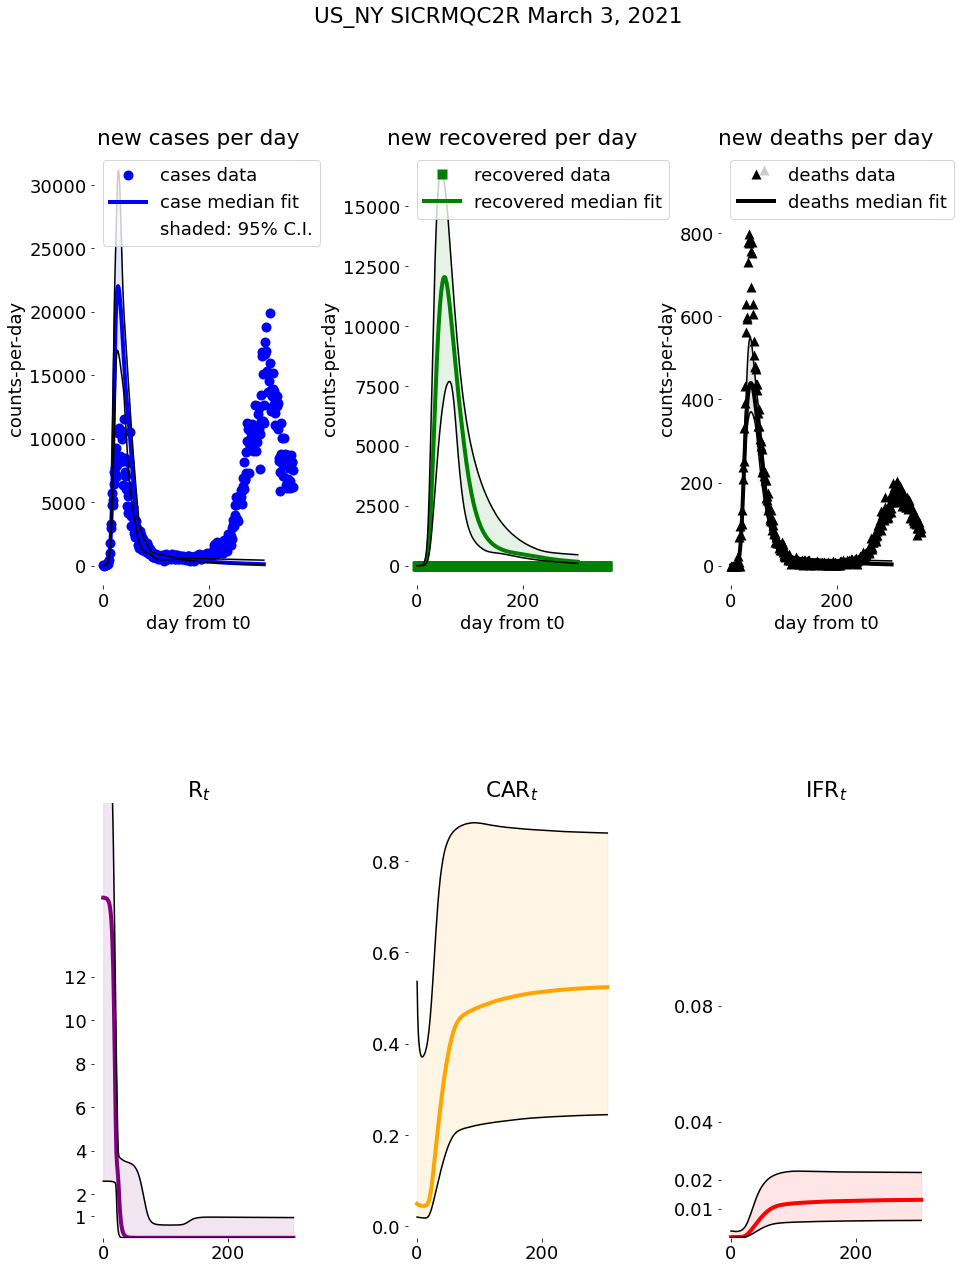

In [24]:
for model_name in models:
    print(model_name)
    samples = ncs.extract_samples(fits_path, models_path, model_name, roi, 1)
    nsamples = shape(samples['mbase'])[0]
    for i in np.arange(1000,1,-1).astype(str):
        try:
            a = samples['lambda['+i+',1]']
            break
        except:
            pass
    nobs = int(i)
    c = zeros((nsamples,1))
    r = zeros((nsamples,1))
    d = zeros((nsamples,1))
    Rt = zeros((nsamples,1))
    CARt = zeros((nsamples,1))
    IFRt = zeros((nsamples,1))

    for i in range(1,nobs+1):
        c = np.hstack((c,samples['lambda['+str(i)+',1]'][:,None]))
        r = np.hstack((r,samples['lambda['+str(i)+',2]'][:,None]))
        d = np.hstack((d,samples['lambda['+str(i)+',3]'][:,None]))
        Rt = np.hstack((Rt,samples['Rt['+str(i)+']'][:,None]))
        CARt = np.hstack((CARt,samples['car['+str(i)+']'][:,None]))
        IFRt = np.hstack((IFRt,samples['ifr['+str(i)+']'][:,None]))

c = c[:,1:]
r = r[:,1:]
d = d[:,1:]
Rt = Rt[:,1:]
CARt = CARt[:,1:]
IFRt = IFRt[:,1:]
                       
                       
lw = 4
f,ax = subplots(2,3,figsize=(15,20))
ax = ax.flatten()
a = 0.1
x = arange(nobs)
plot_ts(ax[:3],c,r,d,x)

ax[3].set_title(r'R$_t$')
plotXt(ax[3],Rt,x,'purple')
ax[3].set_ylim((0,20))
ax[3].set_yticks([1,2,4,6,8,10,12])

ax[4].set_title(r'CAR$_t$')
plotXt(ax[4],CARt,x,'orange')

ax[5].set_title(r'IFR$_t$')
plotXt(ax[5],IFRt,x,'red')
ax[5].set_ylim((0,0.15))
ax[5].set_yticks([0.01,0.02,0.04,0.08])

suptitle(roi + ' {} March 3, 2021'.format(model_name)) # Change date
subplots_adjust(wspace=0.5,hspace=0.5)
f.savefig('{}{}_{}.png'.format(figures_path, model_name, roi))

